In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d kunalgupta2616/dog-vs-cat-images-data

Dataset URL: https://www.kaggle.com/datasets/kunalgupta2616/dog-vs-cat-images-data
License(s): GPL-2.0
dog-vs-cat-images-data.zip: Skipping, found more recently modified local copy (use --force to force download)


# Unzipping the dataset file

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dog-vs-cat-images-data.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

#Using generators due to large datasets

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dogcat/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    color_mode='rgb'
)

test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dogcat/validation',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    color_mode='rgb'
)

Found 25000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.


#Normalizing the image data in the range of [0, 1]

In [6]:
def process(image, label):
  image = tensorflow.cast(image/255.0, tensorflow.float32)
  return image, label

In [7]:
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

#Training the model

***Model Architechture***

_________________________________________________________

*Convolutional Layers*

Layer 1 -> Conv2D(10) | Batch Nomalization | Max Pooling (Pool size = 2 x 2 , Stride = 2)

Layer 2 -> Conv2D(20) | Batch Nomalization | Max Pooling (Pool size = 2 x 2 , Stride = 2)

Layer 3 -> Conv2D(40) | Batch Nomalization | Max Pooling (Pool size = 2 x 2 , Stride = 2)

Layer 4 -> Conv2D(80) | Batch Nomalization | Max Pooling (Pool size = 2 x 2 , Stride = 2)

_________________________________________________________

Data Flattening

_________________________________________________________

*Artificial Neural Layers*

Layer 1 -> Dense(80) | relu | Dropout ( p = 0.1 )

Layer 2 -> Dense(40) | relu | Dropout ( p = 0.1 )

Layer 3 -> Dense(20) | relu | Dropout ( p = 0.1 )

Layer 4 -> Dense(10) | relu | Dropout ( p = 0.1 )

Layer 5 -> Output layer | sigmoid

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.125))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.125))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.125))

model.add(Conv2D(256, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.125))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.125))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.125))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.125))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 50176)          │       200,704 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,802,897 (14.51 MB)

 Trainable params: 3,701,585 (14.12 MB)

 Non-trainable params: 101,312 (395.75 KB)

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 116ms/step - accuracy: 0.5420 - loss: 0.9831 - val_accuracy: 0.5966 - val_loss: 0.6642
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.6122 - loss: 0.6329 - val_accuracy: 0.5142 - val_loss: 0.8800
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.6967 - loss: 0.5633 - val_accuracy: 0.7088 - val_loss: 0.5576
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.7480 - loss: 0.5127 - val_accuracy: 0.7736 - val_loss: 0.4757
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.8003 - loss: 0.4361 - val_accuracy: 0.8066 - val_loss: 0.4061
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.8294 - loss: 0.3893 - val_accuracy: 0.7878 - val_loss: 0.4578
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.8625 - loss: 0.3327 - val_accuracy: 0.8269 - val_loss: 0.3599
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.8871 - loss: 0

In [12]:
import matplotlib.pyplot as plt

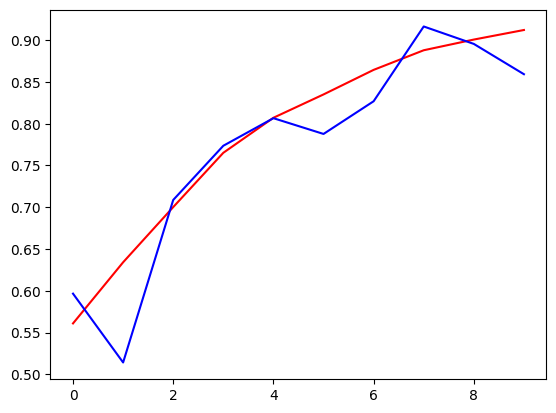

In [13]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

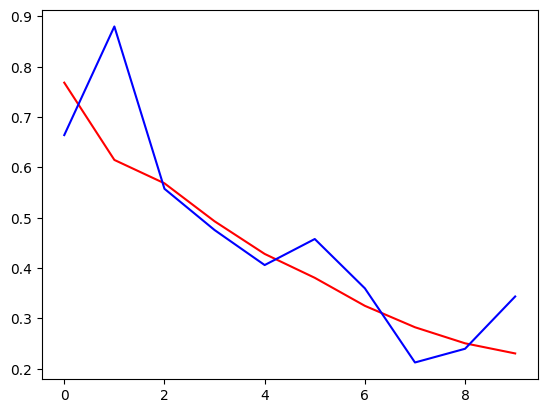

In [14]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')